##My experiments with Monte Carlo Simulations

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
from numpy.random import random

###Estimating Pi

Let's generate a dataframe of 1000 samples with randomized x and y values. 

In [25]:
df = pd.DataFrame({'x':random(1000),'y':random(1000)})

In [9]:
df.head()

,x,y
0,0.116960,0.246016
1,0.764686,0.126647
2,0.836542,0.250002
3,0.039142,0.205430
4,0.076737,0.459403


Now let's plot these random x and y values

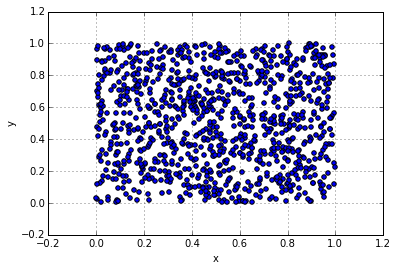

In [14]:
df.plot(x='x',y='y',kind='scatter')

For easier calculate, let's restrict these values between -1 and 1.

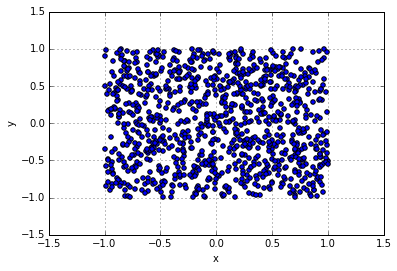

In [26]:
df2 = pd.DataFrame()
df2['x'] = 1 - 2 * df['x']
df2['y'] = 1 - 2 * df['y']
df2.plot(x='x',y='y',kind='scatter')

In [27]:
df2.describe()

,x,y
count,1000.000000,1000.000000
mean,0.013757,0.011781
std,0.568066,0.571718
min,-0.996989,-0.997801
25%,-0.492942,-0.483869
50%,0.033968,0.026382
75%,0.498658,0.507497
max,0.999095,0.999645


Now let's find out the points that lie inside the unit circle.
i.e, points such that x^2 + y^2 < 1

In [32]:
# The truth values
(df2['x']**2 + df2['y']**2 < 1).head()

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [33]:
# Now we select these values and make a new dataframe
df_circle = df2[df2['x']**2 + df2['y']**2 < 1]

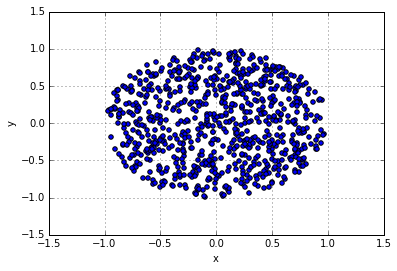

In [35]:
df_circle.plot(x='x',y='y',kind='scatter')

That doesn't quite look like a circle. Let's fix the aspect ratio

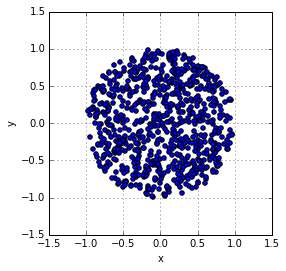

In [39]:
ax = df_circle.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

Much better!

Now, area of this circle is $\pi * 1^2$. Area of the square we plotted earlier is $2^2$. So, the ratio of the $ \frac{area of the circle}{area of the square} = \frac{\pi}{4}$

Let's see if we can estimate $\pi$ using Monte Carlo method. Let's divide the number of points in the circle from the total number of points.

In [47]:
print(len(df_circle))
print(len(df2))
print(len(df_circle)/len(df2))
print(4 * len(df_circle)/len(df2))

800
1000
0.8
3.2


This value is close to the actual value of pi, 3.14. Let's repeat the experiment with a lot more samples.

In [59]:
df_high = pd.DataFrame({'x':1-2*random(10000),'y':1-2*random(10000)})
df_high.head()

,x,y
0,-0.339063,0.966866
1,0.507249,-0.468834
2,0.515510,-0.771811
3,-0.943407,-0.957749
4,0.385889,0.450328


In [60]:
df_circle_high = df_high[df_high['x']**2 + df_high['y']**2 < 1]
print(4* len(df_circle_high)/len(df_high))

3.1504


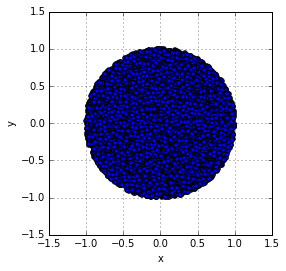

In [61]:
ax = df_circle_high.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

That looks great!